In [72]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

merged_dir: Path 
clean_dir: Path
file_name: str
df: pd.DataFrame
target: str

merged_dir = Path('../data/merged')
clean_dir = Path('../data/clean')
target = 'Win'

In [73]:
# - - - ARAM - - -
file_name = 'num_ARAM.csv'

df = pd.read_csv(merged_dir / file_name).set_index('#')
print(
    df[target].value_counts(normalize=True), # ok
    f'{df.index.is_unique=}', # True
    df.dtypes, # ok
    sep='\n\n' 
) 

df['TurretDmgDealt>1'] = (df['TurretDmgDealt'] > 1).astype(int) # numeric > boolean variable to simplify the analysis
df = df.drop([
    'TurretDmgDealt', # cleaning after creating a binary variable
    'CurrentMasteryPoints', 'DragonKills', 'BaronKills', 'visionScore', # as per exploration
    'GameDuration' # no corr to win, corrs to other variables
    ], axis=1) 

df.to_csv(clean_dir / file_name)

Win
1    0.515316
0    0.484684
Name: proportion, dtype: float64

df.index.is_unique=True

MinionsKilled           int64
DmgDealt                int64
DmgTaken                int64
TurretDmgDealt          int64
TotalGold               int64
Win                     int64
kills                   int64
deaths                  int64
assists                 int64
CurrentMasteryPoints    int64
DragonKills             int64
BaronKills              int64
visionScore             int64
GameDuration            int64
dtype: object


In [ ]:
# df = df.drop(['Lane'], axis=1) # ARAM doesn't have lanes

In [70]:




# # some modes don't have e.g. barons or dragons, turrets - dropna in numeric cols will take care of that
# modes: dict[str, dict[str, pd.DataFrame]] = {}
# for name, frame in df.groupby('QueueType'): 
#     num_cols = frame.select_dtypes(include='number').dropna(axis=1)
#     num_cols = num_cols.loc[:, (num_cols != 0).any(axis=0)]
#     cat_cols = frame.select_dtypes(include=['object'])
#     cat_cols = cat_cols.merge(frame[target], how='left', left_index=True, right_index=True)
#     modes[str(name)] = {'num_cols': num_cols, 'cat_cols': cat_cols} 

# # ARAM and CHERRY shouldn't have lanes
# modes['ARAM']['cat_cols'] = modes['ARAM']['cat_cols'].drop('Lane', axis=1)
# modes['CHERRY']['cat_cols'] = modes['CHERRY']['cat_cols'].drop('Lane', axis=1)

# # It was determined during data exploration that the turrets destroyed can be simplified to a binary feature, but each mode has it's own magic number
# # ARAM: 1, CLASSIC: 3, SWIFTPLAY and ULTBOOK: 2
# modes['ARAM']['num_cols']['TurretsDestr>1'] = (modes['ARAM']['num_cols']['TurretDmgDealt'] > 1).astype(int)
# modes['CLASSIC']['num_cols']['TurretsDestr>3'] = (modes['CLASSIC']['num_cols']['TurretDmgDealt'] > 3).astype(int)
# modes['SWIFTPLAY']['num_cols']['TurretsDestr>2'] = (modes['SWIFTPLAY']['num_cols']['TurretDmgDealt'] > 2).astype(int)
# modes['ULTBOOK']['num_cols']['TurretsDestr>2'] = (modes['ULTBOOK']['num_cols']['TurretDmgDealt'] > 2).astype(int)

# modes['ARAM']['num_cols'] = modes['ARAM']['num_cols'].drop(['TurretDmgDealt'], axis=1)
# modes['CLASSIC']['num_cols'] = modes['CLASSIC']['num_cols'].drop(['TurretDmgDealt'], axis=1)
# modes['SWIFTPLAY']['num_cols'] = modes['SWIFTPLAY']['num_cols'].drop(['TurretDmgDealt'], axis=1)
# modes['ULTBOOK']['num_cols'] = modes['ULTBOOK']['num_cols'].drop(['TurretDmgDealt'], axis=1)

# # modes other than ULTBOOK are insensitive to CurrentMasteryPoints
# for mode in modes:
#     if mode == 'ULTBOOK': continue
#     modes[mode]['num_cols'] = modes[mode]['num_cols'].drop(['CurrentMasteryPoints', 'GameDuration'], axis=1)



In [ ]:
# - - - CHERRY - - - 
file_name = 'num_CHERRY.csv'

df = pd.read_csv(merged_dir / file_name).set_index('#')
print(
    df[target].value_counts(normalize=True), # ok
    f'{df.index.is_unique=}', # True
    df.dtypes, # ok
    sep='\n\n' 
) 

df = df.drop([
    'TurretDmgDealt', # cleaning after creating a binary variable
    'CurrentMasteryPoints', 'DragonKills', 'BaronKills', 'visionScore', # as per exploration
    'GameDuration' # no corr to win, corrs to other variables
    ], axis=1) 

df.to_csv(clean_dir / file_name)

Win
1    0.511136
0    0.488864
Name: proportion, dtype: float64

df.index.is_unique=True

MinionsKilled           int64
DmgDealt                int64
DmgTaken                int64
TurretDmgDealt          int64
TotalGold               int64
Win                     int64
kills                   int64
deaths                  int64
assists                 int64
CurrentMasteryPoints    int64
DragonKills             int64
BaronKills              int64
visionScore             int64
GameDuration            int64
dtype: object


In [ ]:
# modes['CHERRY']['cat_cols'] = modes['CHERRY']['cat_cols'].drop('Lane', axis=1)

In [ ]:
# - - - CLASSIC - - - 
file_name = 'num_CLASSIC.csv'

df = pd.read_csv(merged_dir / file_name).set_index('#')
print(
    df[target].value_counts(normalize=True), # ok
    f'{df.index.is_unique=}', # True
    df.dtypes, # ok
    sep='\n\n' 
) 

df['TurretDmgDealt>3'] = (df['TurretDmgDealt'] > 3).astype(int) # numeric > boolean variable to simplify the analysis
df = df.drop([
    'TurretDmgDealt',
    'CurrentMasteryPoints', 'visionScore', # as per exploration
    'GameDuration' # no corr to win, corrs to other variables
    ], axis=1) 

df.to_csv(clean_dir / file_name)

Win
1    0.503427
0    0.496573
Name: proportion, dtype: float64

df.index.is_unique=True

MinionsKilled           int64
DmgDealt                int64
DmgTaken                int64
TurretDmgDealt          int64
TotalGold               int64
Win                     int64
kills                   int64
deaths                  int64
assists                 int64
CurrentMasteryPoints    int64
DragonKills             int64
BaronKills              int64
visionScore             int64
GameDuration            int64
dtype: object


In [77]:
# - - - SWIFTPLAY - - - 
file_name = 'num_SWIFTPLAY.csv'

df = pd.read_csv(merged_dir / file_name).set_index('#')
print(
    df[target].value_counts(normalize=True), # ok
    f'{df.index.is_unique=}', # True
    df.dtypes, # ok
    sep='\n\n' 
) 

df['TurretDmgDealt>2'] = (df['TurretDmgDealt'] > 2).astype(int) # numeric > boolean variable to simplify the analysis
df = df.drop([
    'TurretDmgDealt',
    'CurrentMasteryPoints', 'visionScore', 'DragonKills', 'BaronKills', 'GameDuration' # as per exploration
    ], axis=1) 

df.to_csv(clean_dir / file_name)

Win
1    0.548679
0    0.451321
Name: proportion, dtype: float64

df.index.is_unique=True

MinionsKilled           int64
DmgDealt                int64
DmgTaken                int64
TurretDmgDealt          int64
TotalGold               int64
Win                     int64
kills                   int64
deaths                  int64
assists                 int64
CurrentMasteryPoints    int64
DragonKills             int64
BaronKills              int64
visionScore             int64
GameDuration            int64
dtype: object


In [ ]:
# - - - ULTBOOK - - - 
file_name = 'num_ULTBOOK.csv'

df = pd.read_csv(merged_dir / file_name).set_index('#')
print(
    df[target].value_counts(normalize=True), # not ok
    f'{df.index.is_unique=}', # True
    df.dtypes, # ok
    sep='\n\n' 
) 

df['TurretDmgDealt>2'] = (df['TurretDmgDealt'] > 2).astype(int) # numeric > boolean variable to simplify the analysis
df = df.drop([
    'TurretDmgDealt' # leave everything else due to complex correlations
    ], axis=1) 

df.to_csv(clean_dir / file_name)

Win
1    0.642857
0    0.357143
Name: proportion, dtype: float64

df.index.is_unique=True

MinionsKilled           int64
DmgDealt                int64
DmgTaken                int64
TurretDmgDealt          int64
TotalGold               int64
Win                     int64
kills                   int64
deaths                  int64
assists                 int64
CurrentMasteryPoints    int64
DragonKills             int64
BaronKills              int64
visionScore             int64
GameDuration            int64
dtype: object


c=0.01, mode='ARAM'
5-fold CV ROC-AUC scores: [0.84639306 0.84695739 0.84741539 0.85460107 0.85506731]
Mean CV ROC-AUC: 0.850
Std CV ROC-AUC:  0.004
Test ROC-AUC: 0.8375057895014968
                         feature  coefficient
8                 TurretsDestr>1     1.713495
5                         deaths    -1.025932
4                          kills     0.539748
23       DmgDealt TurretsDestr>1    -0.377231
6                        assists     0.338799
31              TotalGold deaths     0.282941
29       DmgTaken TurretsDestr>1    -0.257946
0                  MinionsKilled    -0.171177
43        assists TurretsDestr>1    -0.163649
26               DmgTaken deaths     0.156496
3                      TotalGold    -0.134964
39                deaths assists     0.129416
36                 kills assists     0.090775
19                DmgDealt kills    -0.062127
42           assists visionScore     0.008217
32             TotalGold assists     0.000000
30               TotalGold kills    

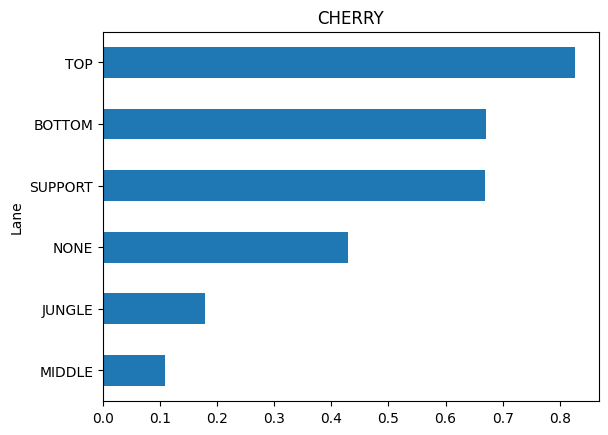

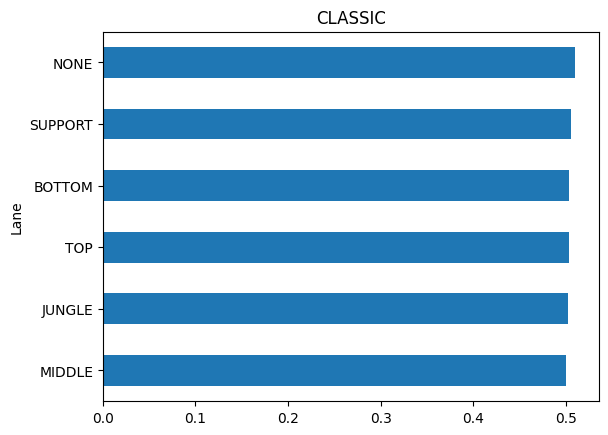

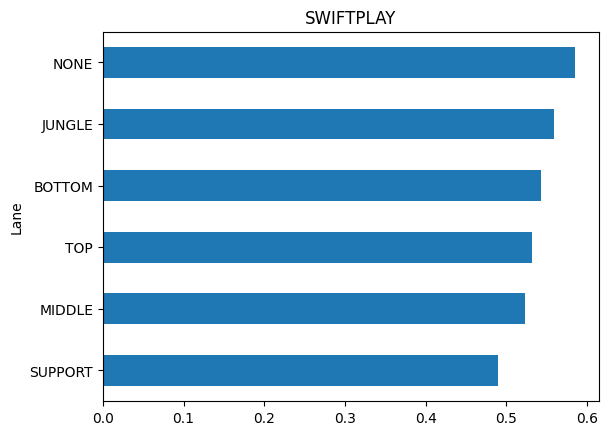

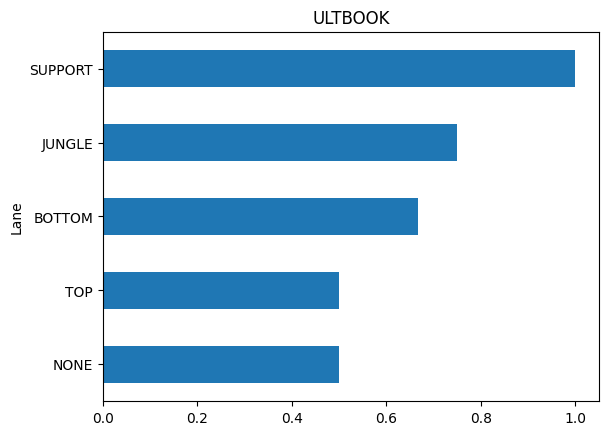

In [ ]:
for mode in modes:
    if mode == 'ARAM': continue
    winrate_by_lane = modes[mode]['cat_cols'].groupby('Lane')['Win'].mean()
    winrate_by_lane.sort_values().plot(kind='barh')
    plt.title(mode)
    plt.show()
    # display(modes[mode]['cat_cols'])

,Lane,item1,item2,item3,item4,item5,item6,PrimaryKeyStone,PrimarySlot1,PrimarySlot2,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,EnemyChampion,Champion,QueueType,RankName,Win
3826,BOTTOM,Infinity Edge,The Collector,Navori Flickerblade,Mercury's Treads,Mortal Reminder,Maw of Malmortius,Press the Attack,Presence of Mind,Legend: Bloodline,Coup de Grace,Magical Footwear,Biscuit Delivery,Flash,Placeholder,Draven,Lucian,ULTBOOK,Unranked,0
3846,BOTTOM,Infinity Edge,The Collector,Navori Flickerblade,Mercury's Treads,Mortal Reminder,Maw of Malmortius,Press the Attack,Presence of Mind,Legend: Bloodline,Coup de Grace,Magical Footwear,Biscuit Delivery,Flash,Placeholder,Draven,Lucian,ULTBOOK,Unranked,0
12208,TOP,Void Staff,Sorcerer's Shoes,Luden's Companion,Mejai's Soulstealer,Rabadon's Deathcap,NaN,Arcane Comet,Manaflow Band,Transcendence,Scorch,Biscuit Delivery,Cosmic Insight,Placeholder,Flash,Lux,Lux,ULTBOOK,Unranked,1
12209,TOP,Doran's Ring,Luden's Companion,Zhonya's Hourglass,Sorcerer's Shoes,Needlessly Large Rod,Needlessly Large Rod,Arcane Comet,Manaflow Band,Transcendence,Scorch,Cheap Shot,Ultimate Hunter,Placeholder,Flash,TahmKench,Lux,ULTBOOK,Unranked,0
12210,BOTTOM,Luden's Companion,Zaz'Zak's Realmspike,Sorcerer's Shoes,Mejai's Soulstealer,Stormsurge,Void Staff,Arcane Comet,Manaflow Band,Transcendence,Scorch,Biscuit Delivery,Cosmic Insight,Placeholder,Flash,MissFortune,Lux,ULTBOOK,Unranked,1
12211,JUNGLE,Black Cleaver,Boots of Swiftness,Stridebreaker,Dead Man's Plate,Giant's Belt,Winged Moonplate,Grasp of the Undying,Demolish,Second Wind,Unflinching,Triumph,Coup de Grace,Placeholder,Flash,Kayle,Garen,ULTBOOK,Unranked,1
12212,BOTTOM,Zaz'Zak's Realmspike,Sorcerer's Shoes,Luden's Companion,Void Staff,Rabadon's Deathcap,Stormsurge,Arcane Comet,Manaflow Band,Transcendence,Scorch,Cosmic Insight,Biscuit Delivery,Placeholder,Flash,LeeSin,Lux,ULTBOOK,Unranked,1
12213,NONE,Zaz'Zak's Realmspike,Luden's Companion,Stormsurge,Sorcerer's Shoes,Needlessly Large Rod,Needlessly Large Rod,Arcane Comet,Manaflow Band,Transcendence,Scorch,Cosmic Insight,Biscuit Delivery,Placeholder,Flash,Mordekaiser,Lux,ULTBOOK,Unranked,1
12214,BOTTOM,Zaz'Zak's Realmspike,Sorcerer's Shoes,Zhonya's Hourglass,Stormsurge,Rabadon's Deathcap,Luden's Companion,Arcane Comet,Manaflow Band,Transcendence,Scorch,Cosmic Insight,Biscuit Delivery,Flash,Placeholder,Ziggs,Lux,ULTBOOK,Unranked,1
12228,TOP,Void Staff,Sorcerer's Shoes,Luden's Companion,Mejai's Soulstealer,Rabadon's Deathcap,NaN,Arcane Comet,Manaflow Band,Transcendence,Scorch,Biscuit Delivery,Cosmic Insight,Placeholder,Flash,Lux,Lux,ULTBOOK,Unranked,1
